In [1]:
import torch, polars as pl, altair as alt
print("torch ✅", torch.__version__)
print("polars ✅", pl.__version__)
print("altair ✅", alt.__version__)
x = torch.rand(2, 3)
print("tensor:", x)



torch ✅ 2.9.0+cpu
polars ✅ 1.35.1
altair ✅ 5.5.0
tensor: tensor([[0.0417, 0.2712, 0.9771],
        [0.8110, 0.5271, 0.8375]])


In [3]:
from binance.client import Client
import pandas as pd
from datetime import datetime

# Initialize the Binance client (public data only)
client = Client()

# Parameters
symbol = "BTCUSDT"          # Change to any pair you want
interval = "1h"             # e.g. "1m", "15m", "1h", "1d"
start_date = "2020-01-01"   # You can use e.g. "1 Jan, 2020"
end_date = datetime.now().strftime("%d %b, %Y %H:%M:%S")

# Download historical klines
klines = client.get_historical_klines(symbol, interval, start_date, end_date)


In [4]:
# Convert to DataFrame
cols = [
    "timestamp", "open", "high", "low", "close", "volume",
    "close_time", "quote_asset_volume", "num_trades",
    "taker_buy_base", "taker_buy_quote", "ignore"
]

df = pd.DataFrame(klines, columns=cols)

# Convert datatypes
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")
numeric_cols = ["open", "high", "low", "close", "volume"]
df[numeric_cols] = df[numeric_cols].astype(float)

# Set index
df.set_index("timestamp", inplace=True)

# Drop unused columns
df = df[["open", "high", "low", "close", "volume"]]

print(df.head())


                        open     high      low    close      volume
timestamp                                                          
2020-01-01 00:00:00  7195.24  7196.25  7175.46  7177.02  511.814901
2020-01-01 01:00:00  7176.47  7230.00  7175.71  7216.27  883.052603
2020-01-01 02:00:00  7215.52  7244.87  7211.41  7242.85  655.156809
2020-01-01 03:00:00  7242.66  7245.00  7220.00  7225.01  783.724867
2020-01-01 04:00:00  7225.00  7230.00  7215.03  7217.27  467.812578


<Axes: title={'center': 'BTCUSDT Close Price'}, xlabel='timestamp'>

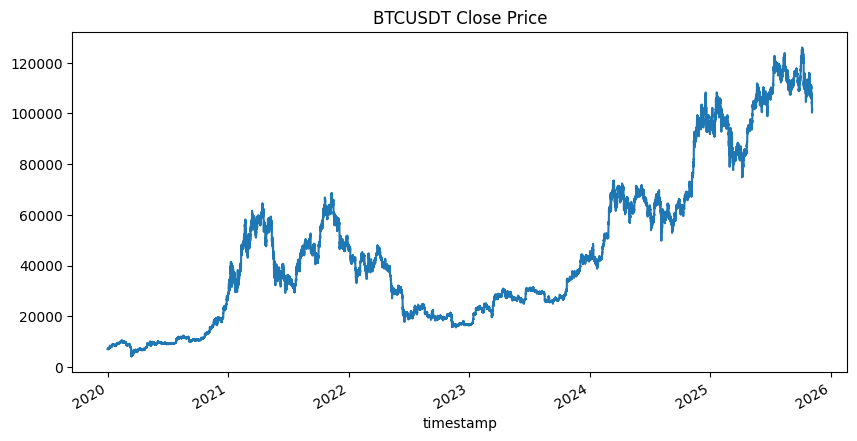

In [8]:
# bec the timestamp is set to index, then you do not need to call it for pd to recognise its the x axis.
df["close"].plot(figsize=(10,5), title="BTCUSDT Close Price")


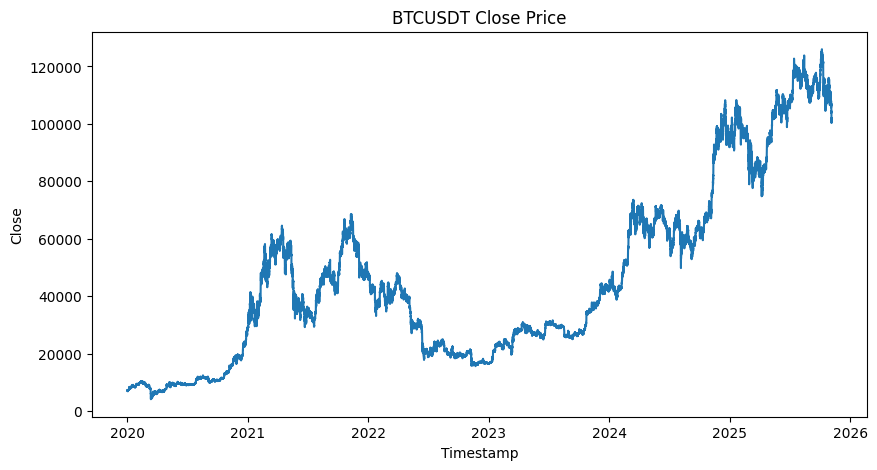

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(df.index, df["close"])
plt.title("BTCUSDT Close Price")
plt.xlabel("Timestamp")
plt.ylabel("Close")
plt.show()
